**This notebook is an exercise in the [Time Series](https://www.kaggle.com/learn/time-series) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/linear-regression-with-time-series).**

---


# Introduction #

Run this cell to set everything up!

In [27]:
# Setup feedback system
# from learntools.core import binder
# binder.bind(globals())
# from learntools.time_series.ex1 import *

# Setup notebook
from pathlib import Path
# from learntools.time_series.style import *  # plot style settings

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

data_dir = Path('data/')
comp_dir = Path('data/')

book_sales = pd.read_csv(
    data_dir / 'book_sales.csv',
    index_col='Date',
    parse_dates=['Date'],
).drop('Paperback', axis=1) # only keep the hardcover sales
book_sales['Time'] = np.arange(len(book_sales.index)) # add time dummy variable
book_sales['Lag_1'] = book_sales['Hardcover'].shift(1) # add lagged sales with shift 1

print("before reindex:")
print(book_sales.head())
book_sales = book_sales.reindex(columns=['Hardcover', 'Time', 'Lag_1']) # why reindex?

print("\n after reindex:")
print(book_sales.head())

print(f"book sale shape: {book_sales.shape}")

ar = pd.read_csv(data_dir / 'ar.csv')
print(f"ar shape: {ar.shape}")

print("\nar data:")
print(ar.head())

dtype = {
    'store_nbr': 'category',
    'family': 'category',
    'sales': 'float32',
    'onpromotion': 'uint64',
}
store_sales = pd.read_csv(
    comp_dir / 'train.csv',
    dtype=dtype,
    parse_dates=['date'],
    infer_datetime_format=True,
)

print("\nbefore fix:")
print(store_sales.head())
store_sales = store_sales.set_index('date').to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True) # creates a multi-index dataframe.

print("\n after fix:")
print(store_sales.head(40))

average_sales = store_sales.groupby('date').mean()['sales']
print("\n average:")
print(average_sales.head())

before reindex:
            Hardcover  Time  Lag_1
Date                              
2000-04-01        139     0    NaN
2000-04-02        128     1  139.0
2000-04-03        172     2  128.0
2000-04-04        139     3  172.0
2000-04-05        191     4  139.0

 after reindex:
            Hardcover  Time  Lag_1
Date                              
2000-04-01        139     0    NaN
2000-04-02        128     1  139.0
2000-04-03        172     2  128.0
2000-04-04        139     3  172.0
2000-04-05        191     4  139.0
book sale shape: (30, 3)
ar shape: (100, 2)

ar data:
        ar1       ar2
0  0.541286 -1.234475
1 -1.692950  3.532498
2 -1.730106 -3.915508
3 -0.783524  2.820841
4 -1.796207 -1.084120

before fix:
   id       date store_nbr      family  sales  onpromotion
0   0 2013-01-01         1  AUTOMOTIVE    0.0            0
1   1 2013-01-01         1   BABY CARE    0.0            0
2   2 2013-01-01         1      BEAUTY    0.0            0
3   3 2013-01-01         1   BEVERAGES    

--------------------------------------------------------------------------------

One advantage linear regression has over more complicated algorithms is that the models it creates are *explainable* -- it's easy to interpret what contribution each feature makes to the predictions. In the model `target = weight * feature + bias`, the `weight` tells you by how much the `target` changes on average for each unit of change in the `feature`.

Run the next cell to see a linear regression on *Hardcover Sales*.

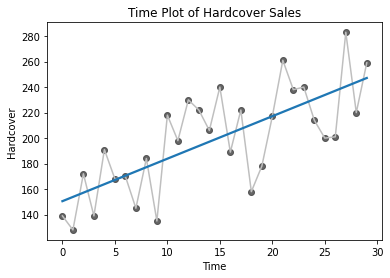

In [6]:
fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=book_sales, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=book_sales, ci=None, scatter_kws=dict(color='0.25')) # regression plot
ax.set_title('Time Plot of Hardcover Sales');

Create a linear regression model from sikitlearn to get the coefficient.

In [18]:
time = book_sales.loc[:,['Time']]
hardcover_Sale = book_sales.loc[:, 'Hardcover']

#print(time)
#print(hardcover_Sale)

linreg = LinearRegression()
linreg.fit(time, hardcover_Sale)

# The coefficients
print("Coefficients: \n", linreg.coef_)
print("Intercept: \n", linreg.intercept_)

Coefficients: 
 [3.33058954]
Intercept: 
 150.53978494623658


# 1) Interpret linear regression with the time dummy

The linear regression line has an equation of (approximately) `Hardcover = 3.33 * Time + 150.5`. Over 6 days how much on average would you expect hardcover sales to change? After you've thought about it, run the next cell.

In [ ]:
# View the solution (Run this line to receive credit!)
#q_1.check()

In [ ]:
# Uncomment the next line for a hint
#q_1.hint()

Now, let's create the lag feature:

In [22]:
lag = book_sales.loc[:,['Lag_1']]
# hardcover_Sale = book_sales.loc[:, 'Hardcover']

lag.dropna(inplace=True)

hardcover_Sale, lag = hardcover_Sale.align(lag, join='inner')
#print(time)
#print(hardcover_Sale)

linreg_lag = LinearRegression()
linreg_lag.fit(lag, hardcover_Sale)

# The coefficients
print("Coefficients: \n", linreg_lag.coef_)
print("Intercept: \n", linreg_lag.intercept_)

sale_pred = pd.Series(linreg_lag.predict(lag), index=lag.index)


Coefficients: 
 [0.47593533]
Intercept: 
 107.25217240540118


plot the lag vs prediction

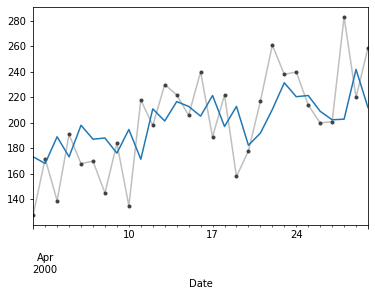

In [26]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
ax = hardcover_Sale.plot(**plot_params)
ax = sale_pred.plot()

In [32]:
time2 = book_sales.loc[:,['Time']]
lag2 = book_sales.loc[:, 'Lag_1']

lag2.dropna(inplace=True)
lag2, time2 = lag2.align(time2, join='inner')

#print(time)
#print(hardcover_Sale)

linreg_lag2 = LinearRegression()
linreg_lag2.fit(time2, lag2)

# The coefficients
print("Coefficients: \n", linreg_lag2.coef_)
print("Intercept: \n", linreg_lag2.intercept_)

Coefficients: 
 [3.24285714]
Intercept: 
 148.115763546798


-------------------------------------------------------------------------------

Interpreting the regression coefficients can help us recognize serial dependence in a time plot. Consider the model `target = weight * lag_1 + error`, where `error` is random noise and `weight` is a number between -1 and 1. The `weight` in this case tells you how likely the next time step will have the same sign as the previous time step: a `weight` close to 1 means `target` will likely have the same sign as the previous step, while a `weight` close to -1 means `target` will likely have the opposite sign.

# 2) Interpret linear regression with a lag feature (not clear)

Run the following cell to see two series generated according to the model just described.

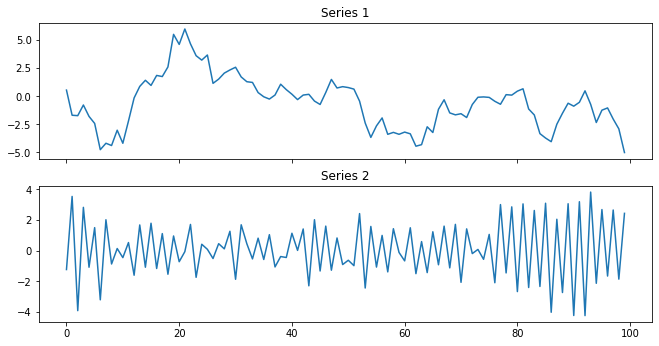

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 5.5), sharex=True)
ax1.plot(ar['ar1'])
ax1.set_title('Series 1')
ax2.plot(ar['ar2'])
ax2.set_title('Series 2');

One of these series has the equation `target = 0.95 * lag_1 + error` and the other has the equation `target = -0.95 * lag_1 + error`, differing only by the sign on the lag feature. Can you tell which equation goes with each series?

In [ ]:
# View the solution (Run this cell to receive credit!)
q_2.check()

In [ ]:
# Uncomment the next line for a hint
#q_2.hint()

-------------------------------------------------------------------------------

Now we'll get started with the *Store Sales - Time Series Forecasting* competition data. The entire dataset comprises almost 1800 series recording store sales across a variety of product families from 2013 into 2017. For this lesson, we'll just work with a single series (`average_sales`) of the average sales each day.

# 3) Fit a time-step feature

Complete the code below to create a linear regression model with a time-step feature on the series of average product sales. The target is in a column called `'sales'`.

In [ ]:
from sklearn.linear_model import LinearRegression

df = average_sales.to_frame()

# YOUR CODE HERE: Create a time dummy
time = ____

df['time'] = time 

# YOUR CODE HERE: Create training data
X = ____  # features
y = ____  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)


# Check your answer
q_3.check()

In [ ]:
# Lines below will give you a hint or solution code
#q_3.hint()
#q_3.solution()

Run this cell if you'd like to see a plot of the result.

In [ ]:
ax = y.plot(**plot_params, alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Total Store Sales');

-------------------------------------------------------------------------------

# 4) Fit a lag feature to Store Sales

Complete the code below to create a linear regression model with a lag feature on the series of average product sales. The target is in a column of `df` called `'sales'`.

In [ ]:
df = average_sales.to_frame()

# YOUR CODE HERE: Create a lag feature from the target 'sales'
lag_1 = ____

df['lag_1'] = lag_1  # add to dataframe

X = df.loc[:, ['lag_1']].dropna()  # features
y = df.loc[:, 'sales']  # target
y, X = y.align(X, join='inner')  # drop corresponding values in target

# YOUR CODE HERE: Create a LinearRegression instance and fit it to X and y.
model = ____

# YOUR CODE HERE: Create Store the fitted values as a time series with
# the same time index as the training data
y_pred = ____


# Check your answer
q_4.check()

In [ ]:
# Lines below will give you a hint or solution code
q_4.hint()
q_4.solution()

Run the next cell if you'd like to see the result.

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set(aspect='equal', ylabel='sales', xlabel='lag_1', title='Lag Plot of Average Sales');

# Keep Going #

[**Model trend**](https://www.kaggle.com/ryanholbrook/trend) in time series with moving average plots and the time dummy.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/time-series/discussion) to chat with other learners.*